# Attempt filtering 0.05 deg SST based on Rossby radius

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cmocean.cm as cmo

import gcm_filters

## Load data

In [2]:
ds1 = xr.open_dataset('esa_cci_v2_1_daily_20100626.nc')
sst = ds1.analysed_sst.squeeze().load()

In [3]:
# LR_raw = xr.open_dataarray('/perm/neam/01_SST_VAR/rossrad_miss_025.nc').squeeze().load()
# LR_7200x3600 = xr.open_dataset('/perm/neam/01_SST_VAR/rossrad_miss_025_7200x3600_v2_compressed.nc').var100.squeeze().load()
LR_7200x3600_miss = xr.open_dataset('rossrad_miss_025_7200x3600_v2_compressed_setmisstonn.nc').var100.squeeze().load()

In [4]:
LR = LR_7200x3600_miss.where(~np.isnan(sst)).load()

In [5]:
ds1 = ds1.sel(lat=slice(-80,None))
sst = sst.sel(lat=slice(-80,None))
LR  = LR.sel(lat=slice(-80,None))

## Plot SST & Rossby radius

In [6]:
sst.min(), sst.max()

(<xarray.DataArray 'analysed_sst' ()>
 array(271.1499939)
 Coordinates:
     time     datetime64[ns] 2010-06-26T12:00:00,
 <xarray.DataArray 'analysed_sst' ()>
 array(307.16998291)
 Coordinates:
     time     datetime64[ns] 2010-06-26T12:00:00)

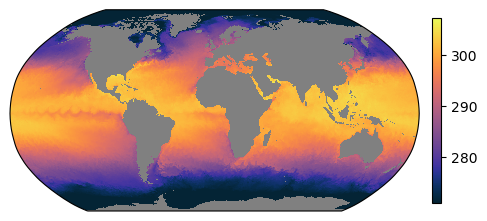

In [7]:
sst.plot(
    x='lon',y='lat',
    subplot_kws=dict(projection=ccrs.Robinson()),
    transform=ccrs.PlateCarree(),
#     levels=np.arange(0,200,5),
    cmap=cmo.thermal,
    add_labels=False,
    cbar_kwargs=dict(orientation='vertical',pad=0.025,shrink=0.5)
)
plt.gca().set_facecolor('grey')
# plt.gca().coastlines(lw=0.5)

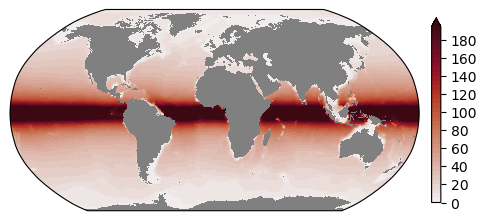

In [8]:
LR.plot(
    x='lon',y='lat',
    subplot_kws=dict(projection=ccrs.Robinson()),
    transform=ccrs.PlateCarree(),
    levels=np.arange(0,200,5),
    cmap=cmo.amp,
    add_labels=False,
    cbar_kwargs=dict(orientation='vertical',pad=0.025,shrink=0.5)
)
plt.gca().set_facecolor('grey')
# plt.gca().coastlines(lw=0.5)

In [10]:
# LR_7200x3600.plot(
#     x='lon',y='lat',
#     subplot_kws=dict(projection=ccrs.Robinson()),
#     transform=ccrs.PlateCarree(),
#     levels=np.arange(0,200,5),
#     cmap=cmo.amp,
#     add_labels=False,
#     cbar_kwargs=dict(orientation='vertical',pad=0.025,shrink=0.5)
# )
# plt.gca().set_facecolor('grey')
# # plt.gca().coastlines(lw=0.5)

# LR_7200x3600_miss.where(~np.isnan(sst)).plot(
#     x='lon',y='lat',
#     subplot_kws=dict(projection=ccrs.Robinson()),
#     transform=ccrs.PlateCarree(),
#     levels=np.arange(0,200,5),
#     cmap=cmo.amp,
#     add_labels=False,
#     cbar_kwargs=dict(orientation='vertical',pad=0.025,shrink=0.5)
# )
# plt.gca().set_facecolor('grey')
# # plt.gca().coastlines(lw=0.5)

[None, None]

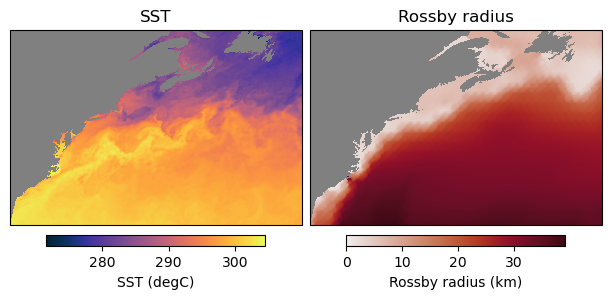

In [9]:
fig, axs = plt.subplots(1,2,subplot_kw=dict(projection=ccrs.Robinson()),figsize=(6,4),constrained_layout=True)
ax = axs.flatten()

sst.sel(
    lat=slice(30,50),lon=slice(280-360,320-360)
).plot(
    ax=ax[0],
    transform=ccrs.PlateCarree(),
    cmap = cmo.thermal,
    cbar_kwargs=dict(shrink=0.75,orientation='horizontal',pad=0.025,label='SST (degC)')
)
ax[0].set_title('SST')

# LR_7200x3600.sel(
LR.sel(
    lat=slice(30,50),lon=slice(280-360,320-360)
).plot(
    vmin=0,
    ax=ax[1],
    transform=ccrs.PlateCarree(),
    cmap = cmo.amp,
    cbar_kwargs=dict(shrink=0.75,orientation='horizontal',pad=0.025,label='Rossby radius (km)')
)
ax[1].set_title('Rossby radius')

[axi.set_extent([280-360,310-360,30,50],crs=ccrs.PlateCarree()) for axi in ax]
[axi.set_facecolor('grey') for axi in ax]

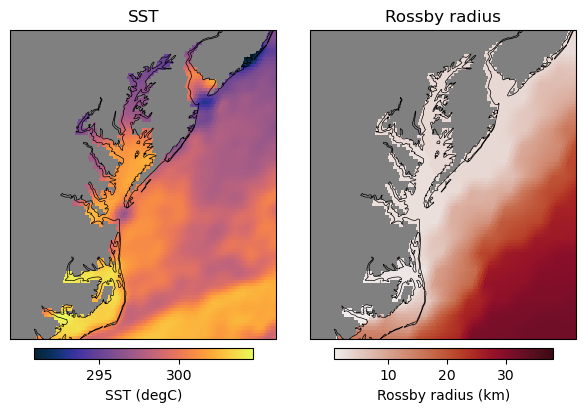

In [10]:
fig, axs = plt.subplots(1,2,subplot_kw=dict(projection=ccrs.Robinson()),figsize=(6,4),constrained_layout=True)
ax = axs.flatten()

sst.sel(
    lat=slice(35,40),lon=slice(282.5-360,288-360)
).plot(
    ax=ax[0],
    transform=ccrs.PlateCarree(),
    cmap = cmo.thermal,
    cbar_kwargs=dict(shrink=0.75,orientation='horizontal',pad=0.025,label='SST (degC)')
)
ax[0].set_title('SST')

LR.sel(
    lat=slice(35,40),lon=slice(282.5-360,288-360)
).plot(
    vmax=38,
    ax=ax[1],
    transform=ccrs.PlateCarree(),
    cmap = cmo.amp,
    cbar_kwargs=dict(shrink=0.75,orientation='horizontal',pad=0.025,label='Rossby radius (km)')
)
ax[1].set_title('Rossby radius')

[axi.set_extent([282.5-360,286-360,35,40],crs=ccrs.PlateCarree()) for axi in ax]
[axi.set_facecolor('grey') for axi in ax]
[axi.coastlines(lw=0.5) for axi in ax]

In [11]:
assert (np.isnan(sst.sel(
#     lat=slice(35,40),lon=slice(280-360,320-360)
    lat=slice(35,40),lon=slice(282.5-360,288-360)
)) == np.isnan(LR.sel(
    lat=slice(35,40),lon=slice(282.5-360,288-360)
))).all()

In [12]:
assert (np.isnan(sst) == np.isnan(LR)).all()

## Set parameters

In [13]:
L_max = LR.max().values
filter_scale = L_max
kappa = LR**2 / L_max**2

In [14]:
L_max

array(200.)

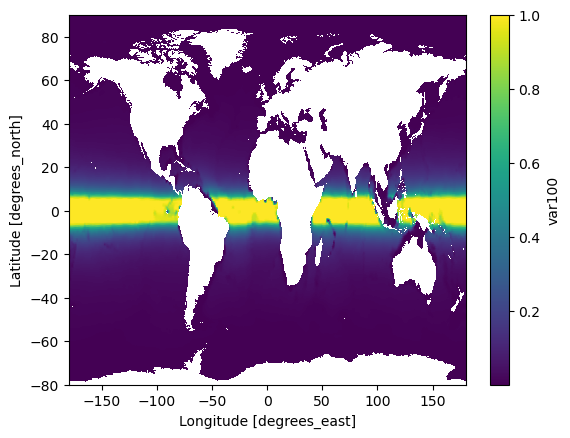

In [15]:
kappa.plot()

In [16]:
wetmask = xr.where(np.isnan(LR) ,0,1)

In [17]:
# compute gridbox area
area = (
    1852*60 * ds1.lat_bnds.diff('bnds').squeeze() # lat
    * 1852*60 * np.cos(np.deg2rad(ds1.lat)) * ds1.lon_bnds.diff('bnds').squeeze() # lon
)

In [18]:
dyw = 1852*60 * ds1.lat_bnds.diff('bnds').squeeze() * xr.ones_like(sst)

In [19]:
# dys = 1852*60 * ???
dys = dyw # set equal for now

In [20]:
dxw = 1852*60 * np.cos(np.deg2rad(ds1.lat)) * ds1.lon_bnds.diff('bnds').squeeze() # lon
dxs = 1852*60 * np.cos(np.deg2rad(ds1.lat_bnds.isel(bnds=0))) * ds1.lon_bnds.diff('bnds').squeeze() # lon

In [26]:
# dx_min = min(dx.min(), dy.min()).values
dx_min = min(dxw.min(),dyw.min(),dxs.min(),dys.min()).values

## Define filters

In [48]:
filter_Ld = gcm_filters.Filter(
    filter_scale=filter_scale*1000,
    dx_min=dx_min,
    filter_shape=gcm_filters.FilterShape.GAUSSIAN,
    transition_width=2*np.pi,
    n_steps=70,
    grid_type=gcm_filters.GridType.IRREGULAR_WITH_LAND,
    grid_vars={
        'wet_mask': wetmask, 
        'area': area, 
        'kappa_w': kappa, 'kappa_s': kappa,
        'dxw' : dxw, 'dyw' : dyw, 'dxs' : dxs, 'dys' : dys
    }
)
filter_Ld

/glade/work/eyankovsky/conda-envs/cesm-exp/lib/python3.7/site-packages/gcm_filters/filter.py:11: UserWarning: You have set n_steps below the default. Results might not be accurate.
  


Filter(filter_scale=200000.0, dx_min=array(2.42394366), filter_shape=<FilterShape.GAUSSIAN: 1>, transition_width=6.283185307179586, ndim=2, n_steps=70, grid_type=<GridType.IRREGULAR_WITH_LAND: 5>)

In [51]:
sst.shape

(3400, 7200)

In [49]:
# filter_Ld10 = gcm_filters.Filter(
#     filter_scale=filter_scale*10,
#     dx_min=dx_min,
#     filter_shape=gcm_filters.FilterShape.GAUSSIAN,
#     grid_type=gcm_filters.GridType.IRREGULAR_WITH_LAND,
#     grid_vars={
#         'wet_mask': wetmask, 
#         'area': area, 
#         'kappa_w': kappa, 'kappa_s': kappa,
#         'dxw' : dxw, 'dyw' : dyw, 'dxs' : dxs, 'dys' : dys
#     }
# )
# filter_Ld10

## Filter

In [52]:
sst_filtered_Ld = filter_Ld.apply(sst, dims=['lat','lon'])

In [ ]:
sst_filtered_Ld10 = filter_Ld10.apply(sst, dims=['lat','lon'])
# sst_filtered_Ld100 = filter_Ld100.apply(sst, dims=['lat','lon'])

In [ ]:
fig, ax = plt.subplots(1,1,subplot_kw=dict(projection=ccrs.Robinson()),figsize=(6,3),constrained_layout=True)

(sst - sst_filtered_Ld).plot(
    ax=ax,
#     vmax=2,
    cmap=cmo.balance,
    add_colorbar=True,
    transform=ccrs.PlateCarree(),
    cbar_kwargs=dict(shrink=0.75,pad=0.025,label=r'$\Delta$ SST (degC)'),
    rasterized=True
)

ax.set_title('0.05x0.05 minus filtered to Rossby radius')
ax.set_facecolor('grey')

# fig.savefig('plots/inspect_sst_7200x3600.pdf',dpi=200)

In [ ]:
fig, ax = plt.subplots(1,1,subplot_kw=dict(projection=ccrs.Robinson()),figsize=(6,3),constrained_layout=True)

(sst - sst_filtered_Ld).plot(
    ax=ax,
    robust=True,
#     vmax=2,
    cmap=cmo.balance,
    add_colorbar=True,
    transform=ccrs.PlateCarree(),
    cbar_kwargs=dict(shrink=0.75,pad=0.025,label=r'$\Delta$ SST (degC)'),
    rasterized=True
)

ax.set_title('0.05x0.05 minus filtered to Rossby radius')
ax.set_facecolor('grey')

# fig.savefig('plots/inspect_sst_7200x3600.pdf',dpi=200)

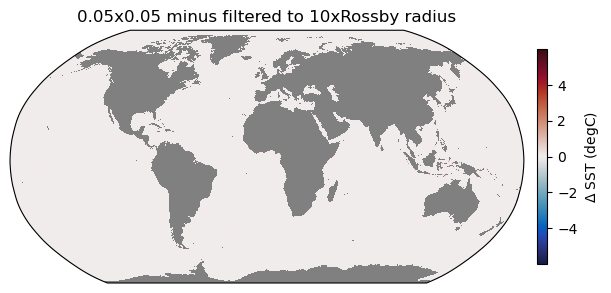

In [20]:
fig, ax = plt.subplots(1,1,subplot_kw=dict(projection=ccrs.Robinson()),figsize=(6,3),constrained_layout=True)

(sst - sst_filtered_Ld10).plot(
    ax=ax,
#     vmax=2,
    cmap=cmo.balance,
    add_colorbar=True,
    transform=ccrs.PlateCarree(),
    cbar_kwargs=dict(shrink=0.75,pad=0.025,label=r'$\Delta$ SST (degC)'),
    rasterized=True
)

ax.set_title('0.05x0.05 minus filtered to 10xRossby radius')
ax.set_facecolor('grey')

# fig.savefig('plots/inspect_sst_7200x3600.pdf',dpi=200)

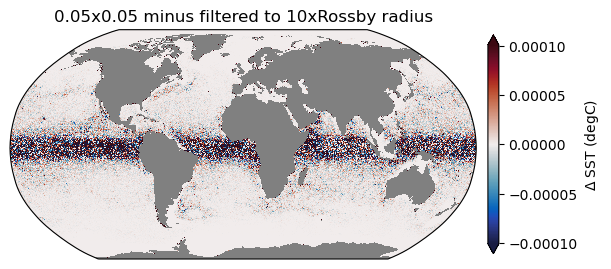

In [22]:
fig, ax = plt.subplots(1,1,subplot_kw=dict(projection=ccrs.Robinson()),figsize=(6,3),constrained_layout=True)

(sst - sst_filtered_Ld10).plot(
    ax=ax,
#     vmax=2,
    robust=True,
    cmap=cmo.balance,
    add_colorbar=True,
    transform=ccrs.PlateCarree(),
    cbar_kwargs=dict(shrink=0.75,pad=0.025,label=r'$\Delta$ SST (degC)'),
    rasterized=True
)

ax.set_title('0.05x0.05 minus filtered to 10xRossby radius')
ax.set_facecolor('grey')

# fig.savefig('plots/inspect_sst_7200x3600.pdf',dpi=200)

In [ ]:
1